In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score, make_scorer

from collections import Counter
import pickle
import joblib

import data_splitter as ds
import data_loader as dl
import feature_extraction as fex
import run_model as rm

2023-04-11 23:37:41.840427: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-11 23:37:42.752061: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-11 23:37:49.216027: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingRandomSearchCV

In [2]:
%load_ext autoreload
%autoreload 2

# Hyperparameter search
Using 25 % of the training set and the PCA model trained on fold 0 as feature extractor

## Image resolution 256 x 256

In [5]:
X = np.load('sample_flatten_X.npy')
y = np.load('sample_flatten_y.npy')

In [6]:
Counter(y)

Counter({0.0: 8570, 1.0: 181})

In [7]:
ipca = pickle.load(open('../feature_extractors/PCA_50_42_256_0.pkl', 'rb'))

rfc = RandomForestClassifier(
               
    warm_start=True, # enable incremental learning
    # n_estimators=2, # starting, +1 every batch
    max_depth=5, # control for complexity
    bootstrap = True,
                
    min_samples_split=3,
    min_samples_leaf=2,
    max_leaf_nodes=None,
                
    #n_jobs=-1,
    random_state=42,
    #verbose=1
    )

pipeline = Pipeline([
    ('feature_extraction', ipca),
    ('classify', rfc)
])

           
param_grid = {
    'classify__n_estimators': np.arange(5, 31, step=5),
    'classify__criterion': ['gini', 'entropy', 'log_loss'],
    'classify__max_samples': np.arange(0.1, 1.1, step=0.1),
    'classify__max_features': ['sqrt', 'log2', None]
}

In [8]:
grid = rm.hp_search(pipeline, param_grid, random_state=42, min_resources=400, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate42_minres400.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 400
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 21
n_resources: 400
Fitting 5 folds for each of 21 candidates, totalling 105 fits
----------
iter: 1
n_candidates: 5
n_resources: 2000
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters:  {'classify__n_estimators': 30, 'classify__max_samples': 0.4, 'classify__max_features': 'sqrt', 'classify__criterion': 'log_loss'}
Best average precision score:  0.04285907033720836


['models/pca_rfc_hp_search_256_randomstate42_minres400.pkl']

In [10]:
grid = rm.hp_search(pipeline, param_grid, random_state=42, min_resources=800, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate42_minres800.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 800
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 10
n_resources: 800
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 2
n_resources: 4000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best hyperparameters:  {'classify__n_estimators': 30, 'classify__max_samples': 0.4, 'classify__max_features': 'sqrt', 'classify__criterion': 'log_loss'}
Best average precision score:  0.027240574994136884


['models/pca_rfc_hp_search_256_randomstate42_minres800.pkl']

In [11]:
grid = rm.hp_search(pipeline, param_grid, random_state=42, min_resources=1600, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate42_minres800.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1600
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 5
n_resources: 1600
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 1
n_candidates: 1
n_resources: 8000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters:  {'classify__n_estimators': 20, 'classify__max_samples': 0.30000000000000004, 'classify__max_features': 'log2', 'classify__criterion': 'log_loss'}
Best average precision score:  0.028390367197220247


['models/pca_rfc_hp_search_256_randomstate42_minres800.pkl']

In [12]:
grid = rm.hp_search(pipeline, param_grid, random_state=0, min_resources=800, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate0_minres800.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 800
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 10
n_resources: 800
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 2
n_resources: 4000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best hyperparameters:  {'classify__n_estimators': 15, 'classify__max_samples': 0.5, 'classify__max_features': 'log2', 'classify__criterion': 'gini'}
Best average precision score:  0.03122295116484631


['models/pca_rfc_hp_search_256_randomstate0_minres800.pkl']

In [13]:
grid = rm.hp_search(pipeline, param_grid, random_state=0, min_resources=1600, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate0_minres1600.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1600
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 5
n_resources: 1600
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 1
n_candidates: 1
n_resources: 8000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters:  {'classify__n_estimators': 30, 'classify__max_samples': 0.2, 'classify__max_features': 'log2', 'classify__criterion': 'gini'}
Best average precision score:  0.02313614891115289


['models/pca_rfc_hp_search_256_randomstate0_minres1600.pkl']

In [14]:
grid = rm.hp_search(pipeline, param_grid, random_state=101, min_resources=800, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate101_minres800.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 800
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 10
n_resources: 800
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 2
n_resources: 4000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best hyperparameters:  {'classify__n_estimators': 30, 'classify__max_samples': 0.30000000000000004, 'classify__max_features': 'log2', 'classify__criterion': 'gini'}
Best average precision score:  0.02660129343163583


['models/pca_rfc_hp_search_256_randomstate101_minres800.pkl']

In [15]:
grid = rm.hp_search(pipeline, param_grid, random_state=101, min_resources=1600, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate101_minres1600.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1600
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 5
n_resources: 1600
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 1
n_candidates: 1
n_resources: 8000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters:  {'classify__n_estimators': 25, 'classify__max_samples': 0.8, 'classify__max_features': 'log2', 'classify__criterion': 'gini'}
Best average precision score:  0.025399529146866467


['models/pca_rfc_hp_search_256_randomstate101_minres1600.pkl']

In [16]:
grid = rm.hp_search(pipeline, param_grid, random_state=555, min_resources=800, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate555_minres800.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 800
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 10
n_resources: 800
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 2
n_resources: 4000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best hyperparameters:  {'classify__n_estimators': 5, 'classify__max_samples': 0.8, 'classify__max_features': None, 'classify__criterion': 'entropy'}
Best average precision score:  0.023189609576681747


['models/pca_rfc_hp_search_256_randomstate555_minres800.pkl']

In [17]:
grid = rm.hp_search(pipeline, param_grid, random_state=555, min_resources=1600, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate555_minres1600.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1600
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 5
n_resources: 1600
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 1
n_candidates: 1
n_resources: 8000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters:  {'classify__n_estimators': 5, 'classify__max_samples': 0.6, 'classify__max_features': 'log2', 'classify__criterion': 'entropy'}
Best average precision score:  0.021020517166534483


['models/pca_rfc_hp_search_256_randomstate555_minres1600.pkl']

In [18]:
grid = rm.hp_search(pipeline, param_grid, random_state=300, min_resources=800, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate300_minres800.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 800
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 10
n_resources: 800
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 2
n_resources: 4000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best hyperparameters:  {'classify__n_estimators': 20, 'classify__max_samples': 1.0, 'classify__max_features': 'log2', 'classify__criterion': 'entropy'}
Best average precision score:  0.03806769545673689


['models/pca_rfc_hp_search_256_randomstate300_minres800.pkl']

In [19]:
grid = rm.hp_search(pipeline, param_grid, random_state=300, min_resources=1600, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate300_minres1600.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1600
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 5
n_resources: 1600
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 1
n_candidates: 1
n_resources: 8000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters:  {'classify__n_estimators': 20, 'classify__max_samples': 0.30000000000000004, 'classify__max_features': 'log2', 'classify__criterion': 'log_loss'}
Best average precision score:  0.02498246232545826


['models/pca_rfc_hp_search_256_randomstate300_minres1600.pkl']

In [20]:
grid = rm.hp_search(pipeline, param_grid, random_state=123, min_resources=800, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate123_minres800.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 800
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 10
n_resources: 800
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 2
n_resources: 4000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best hyperparameters:  {'classify__n_estimators': 25, 'classify__max_samples': 1.0, 'classify__max_features': 'sqrt', 'classify__criterion': 'log_loss'}
Best average precision score:  0.026331948623922748


['models/pca_rfc_hp_search_256_randomstate123_minres800.pkl']

In [21]:
grid = rm.hp_search(pipeline, param_grid, random_state=123, min_resources=1600, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate123_minres1600.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1600
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 5
n_resources: 1600
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 1
n_candidates: 1
n_resources: 8000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters:  {'classify__n_estimators': 20, 'classify__max_samples': 0.30000000000000004, 'classify__max_features': 'log2', 'classify__criterion': 'log_loss'}
Best average precision score:  0.023066991438661345


['models/pca_rfc_hp_search_256_randomstate123_minres1600.pkl']

In [22]:
grid = rm.hp_search(pipeline, param_grid, random_state=321, min_resources=800, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate321_minres800.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 800
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 10
n_resources: 800
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 2
n_resources: 4000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best hyperparameters:  {'classify__n_estimators': 25, 'classify__max_samples': 1.0, 'classify__max_features': 'sqrt', 'classify__criterion': 'log_loss'}
Best average precision score:  0.03766147252789785


['models/pca_rfc_hp_search_256_randomstate321_minres800.pkl']

In [23]:
grid = rm.hp_search(pipeline, param_grid, random_state=321, min_resources=1600, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate321_minres1600.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1600
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 5
n_resources: 1600
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 1
n_candidates: 1
n_resources: 8000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters:  {'classify__n_estimators': 20, 'classify__max_samples': 0.30000000000000004, 'classify__max_features': 'log2', 'classify__criterion': 'log_loss'}
Best average precision score:  0.021048038853903734


['models/pca_rfc_hp_search_256_randomstate321_minres1600.pkl']

In [24]:
grid = rm.hp_search(pipeline, param_grid, random_state=699, min_resources=800, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate699_minres800.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 800
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 10
n_resources: 800
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 2
n_resources: 4000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best hyperparameters:  {'classify__n_estimators': 10, 'classify__max_samples': 0.9, 'classify__max_features': 'sqrt', 'classify__criterion': 'entropy'}
Best average precision score:  0.026633882690869016


['models/pca_rfc_hp_search_256_randomstate699_minres800.pkl']

In [25]:
grid = rm.hp_search(pipeline, param_grid, random_state=699, min_resources=1600, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate699_minres1600.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1600
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 5
n_resources: 1600
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 1
n_candidates: 1
n_resources: 8000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters:  {'classify__n_estimators': 5, 'classify__max_samples': 0.8, 'classify__max_features': 'log2', 'classify__criterion': 'gini'}
Best average precision score:  0.030093108299429506


['models/pca_rfc_hp_search_256_randomstate699_minres1600.pkl']

In [26]:
grid = rm.hp_search(pipeline, param_grid, random_state=18, min_resources=800, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate18_minres800.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 800
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 10
n_resources: 800
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 2
n_resources: 4000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best hyperparameters:  {'classify__n_estimators': 10, 'classify__max_samples': 0.30000000000000004, 'classify__max_features': 'log2', 'classify__criterion': 'gini'}
Best average precision score:  0.023657986092257142


['models/pca_rfc_hp_search_256_randomstate18_minres800.pkl']

In [27]:
grid = rm.hp_search(pipeline, param_grid, random_state=18, min_resources=1600, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate18_minres1600.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1600
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 5
n_resources: 1600
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 1
n_candidates: 1
n_resources: 8000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters:  {'classify__n_estimators': 5, 'classify__max_samples': 0.6, 'classify__max_features': 'log2', 'classify__criterion': 'entropy'}
Best average precision score:  0.026193833269077434


['models/pca_rfc_hp_search_256_randomstate18_minres1600.pkl']

In [28]:
grid = rm.hp_search(pipeline, param_grid, random_state=88, min_resources=800, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate88_minres800.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 800
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 10
n_resources: 800
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 2
n_resources: 4000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best hyperparameters:  {'classify__n_estimators': 20, 'classify__max_samples': 1.0, 'classify__max_features': 'log2', 'classify__criterion': 'entropy'}
Best average precision score:  0.03897878587992644


['models/pca_rfc_hp_search_256_randomstate88_minres800.pkl']

In [29]:
grid = rm.hp_search(pipeline, param_grid, random_state=88, min_resources=1600, verbose=1)

#save your model or results
joblib.dump(grid, '../hyperparameter_search/pca_rfc_hp_search_256_randomstate88_minres1600.pkl')

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1600
max_resources_: 8751
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 5
n_resources: 1600
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 1
n_candidates: 1
n_resources: 8000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters:  {'classify__n_estimators': 20, 'classify__max_samples': 0.30000000000000004, 'classify__max_features': 'log2', 'classify__criterion': 'log_loss'}
Best average precision score:  0.022427068762829693


['models/pca_rfc_hp_search_256_randomstate88_minres1600.pkl']

# Training Random Forest
Using 5-fold cross validation

Evaluation metrics:
- **Average precision** the main metric (summarizes a precision-recall curve (PR AUC) as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight)
- F1-score
- Confustion matrix (true positives/false positives/true negatives/false negatives)
- ROC AUC
- Accuracy
- Precision
- Recall
- Brier score loss


In [3]:
metadata = pd.read_csv('train.csv')
len(metadata.image_id.unique())

54706

In [4]:
splitter = ds.DataSplitter(verbose=True)

Total patient_id in training set:  9530
Total patient_id in test set:  2383
Total image_id in training set:  43767
Total image_id in test set:  10939
Total patient_id in training set:  7624
Total patient_id in calibration set:  1906
Total image_id in training set:  35003
Total image_id in calibration set:  8764


In [5]:
# image id of all sample training set after split to calib and train set

train_img_ids = [id for k, v in splitter.trainset.items() for id in v]
print(len(train_img_ids))

35003


In [6]:
# splitter.trainset is the training set in format of {patient_id: [image_id, ...]}
train_ids = splitter.trainset.keys()
label_by_img = splitter.labels

# getting cross-validation folds from training set
RANDOM_STATE = 42
cv_patient, cv_img = splitter.get_cv(n_splits=5, random_state=RANDOM_STATE)

Splitting training set into 5 stratified k-folds...
--Fold:  0
----Total patient_id in training set:  6099
----Total image_id in training set:  28031
----Total patient_id in validation set:  1525
----Total image_id in validation set:  6972
--Fold:  1
----Total patient_id in training set:  6099
----Total image_id in training set:  28016
----Total patient_id in validation set:  1525
----Total image_id in validation set:  6987
--Fold:  2
----Total patient_id in training set:  6099
----Total image_id in training set:  27937
----Total patient_id in validation set:  1525
----Total image_id in validation set:  7066
--Fold:  3
----Total patient_id in training set:  6099
----Total image_id in training set:  28025
----Total patient_id in validation set:  1525
----Total image_id in validation set:  6978
--Fold:  4
----Total patient_id in training set:  6100
----Total image_id in training set:  28003
----Total patient_id in validation set:  1524
----Total image_id in validation set:  7000


## Image resolution 256 x 256

**Best hyperparameters**: 
- n_estimators = 20
- criterion = 'log_loss'
- max_samples = 0.3
- max_features = 'log2'

**Constant hyperparameters**:
- warm_start = True,
- max_depth = 5,
- bootstrap = True,
- min_samples_split = 3,
- min_samples_leaf = 2,
- max_leaf_nodes = None,
- n_jobs = -1,
- random_state = 42

In [12]:
BATCH_SIZE = 1396 # to get n_estimators = 20 (1 tree per batch)
IMG_SIZE = (256, 256, 1)

BASEPATH = '' # directory of images preprocessed as numpy arrays
EXTRACTOR_PATH = '../feature_extractors' # directory to save trained models

RANDOM_STATE = 42
HP = {'n_estimators': 20, 'criterion': 'log_loss', 'max_samples': 0.3, 'max_features': 'log2', 'class_weight': None}


pca_rfc_256 = rm.run_cv_training(
    
        model_name = 'rfc',
        model_params = HP,
    
        cv_img = cv_img,
        label_img_dict = splitter.labels,
        patient_img_dict = splitter.trainset,
        
        from_numpy = True,
        img_basepath = BASEPATH,
        batch_size = BATCH_SIZE, 
        img_size = IMG_SIZE,
        n_classes = 2,
        shuffle = True,
        normalize = (0, 1),

        feature_extractor_name = 'PCA',
        CNN_preprocess=None,
        n_components = 50,
        extractor_path = EXTRACTOR_PATH,
        savepath = EXTRACTOR_PATH + '/retrain',
        random_state = RANDOM_STATE,
 
        verbose = 1,
        return_model = False
        )

Fold:  0
---Loading feature extractor...
---Creating training and validation data generators...
---Initializing random forest classifier...
---Start training model
------Training batch  0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20
>>> Training time:  1524.8275525569916
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3
>>> Finish training model!
>>> Mean scores over batches: 
{'pr_auc': {'mean': 0.025831449361298785, 'std': 0.004114064160014873}, 'brier_loss': {'mean': 0.020655829396926954, 'std': 0.003356363594625996}, 'roc_auc': {'mean': 0.5306271569815983, 'std': 0.016881728514119947}, 'f1-score': {'mean': 0.0, 'std': 0.0}, 'recall': {'mean': 0.0, 'std': 0.0}, 'precision': {'mean': 0.0, 'std': 0.0}, 'confusion_matrix': {'mean': 349.0, 'std': 588.0143493147085}, 'accuracy': {'mean': 0.9794054441260744, 'std': 0.0035229791498757115}}
---Saving model...
Fold:  1
---Loading feature extractor...


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---Creating training and validation data generators...
---Initializing random forest classifier...
---Start training model
------Training batch  0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20
>>> Training time:  1408.40416097641
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  4
------Calculating scores of batch  4
>>> Finish training model!
>>> Mean scores over batches: 
{'pr_auc': {'mean': 0.02498608083162188, 'std': 0.00967868923245121}, 'brier_loss': {'mean': 0.021649492999377382, 'std': 0.0031991548455027902}, 'roc_auc': {'mean': 0.46771131049632136, 'std': 0.06738564158745472}, 'f1-score': {'mean': 0.0, 'std': 0.0}, 'recall': {'mean': 0.0, 'std': 0.0}, 'precision': {'mean': 0.0, 'std': 0.0}, 'confusion_matrix': {'mean': 349.0, 'std': 587.4168026197412}, 'accuracy': {'mean': 0.9786532951289398, 'std': 0.0034917070507031224}}
---Saving model...
Fold:  2
---Loading feature extractor...


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---Creating training and validation data generators...
---Initializing random forest classifier...
---Start training model
------Training batch  0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20
>>> Training time:  1360.2087700366974
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  4
------Calculating scores of batch  4
>>> Finish training model!
>>> Mean scores over batches: 
{'pr_auc': {'mean': 0.020564708523017367, 'std': 0.0051447543396165255}, 'brier_loss': {'mean': 0.020364777248206394, 'std': 0.00391249881553832}, 'roc_auc': {'mean': 0.49173529920154524, 'std': 0.03695450042155357}, 'f1-score': {'mean': 0.0, 'std': 0.0}, 'recall': {'mean': 0.0, 'std': 0.0}, 'precision': {'mean': 0.0, 'std': 0.0}, 'confusion_matrix': {'mean': 349.0, 'std': 588.3309442822126}, 'accuracy': {'mean': 0.9797994269340975, 'std': 0.0040874907214003085}}
---Saving model...
Fold:  3
---Loading feature extractor...


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---Creating training and validation data generators...
---Initializing random forest classifier...
---Start training model
------Training batch  0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20
>>> Training time:  1347.4560284614563
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3
>>> Finish training model!
>>> Mean scores over batches: 
{'pr_auc': {'mean': 0.02081061451385405, 'std': 0.003444651347101224}, 'brier_loss': {'mean': 0.0215492872437978, 'std': 0.004198530696832968}, 'roc_auc': {'mean': 0.4773247082165721, 'std': 0.026300188014779558}, 'f1-score': {'mean': 0.0, 'std': 0.0}, 'recall': {'mean': 0.0, 'std': 0.0}, 'precision': {'mean': 0.0, 'std': 0.0}, 'confusion_matrix': {'mean': 349.0, 'std': 587.5927586347537}, 'accuracy': {'mean': 0.978868194842407, 'std': 0.00431289204111469}}
---Saving model...
Fold:  4
---Loading feature extractor...


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---Creating training and validation data generators...
---Initializing random forest classifier...
---Start training model
------Training batch  0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20
>>> Training time:  1309.55450963974
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  4
------Calculating scores of batch  4
>>> Finish training model!
>>> Mean scores over batches: 
{'pr_auc': {'mean': 0.022078323503069118, 'std': 0.006750681432835382}, 'brier_loss': {'mean': 0.021792788549395526, 'std': 0.0057124947396490515}, 'roc_auc': {'mean': 0.48165010326486024, 'std': 0.015256423835337169}, 'f1-score': {'mean': 0.0, 'std': 0.0}, 'recall': {'mean': 0.0, 'std': 0.0}, 'precision': {'mean': 0.0, 'std': 0.0}, 'confusion_matrix': {'mean': 349.0, 'std': 587.3230797440197}, 'accuracy': {'mean': 0.9785100286532952, 'std': 0.006027416609731432}}
---Saving model...


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Image Resolution 512 x 512

In [ ]:
BATCH_SIZE = 1396 # to get n_estimators = 20 (1 tree per batch)
IMG_SIZE = (512, 512, 1)

BASEPATH = '' # directory of images preprocessed as numpy arrays
EXTRACTOR_PATH = '../feature_extractors' # directory to save trained models

RANDOM_STATE = 42
HP = {'n_estimators': 20, 'criterion': 'log_loss', 'max_samples': 0.3, 'max_features': 'log2', 'class_weight': None}


pca_rfc_512 = rm.run_cv_training(
    
        model_name = 'rfc',
        model_params = HP,
    
        cv_img = cv_img,
        label_img_dict = splitter.labels,
        patient_img_dict = splitter.trainset,
        
        from_numpy = True,
        img_basepath = BASEPATH,
        batch_size = BATCH_SIZE, 
        img_size = IMG_SIZE,
        n_classes = 2,
        shuffle = True,
        normalize = (0, 1),

        feature_extractor_name = 'PCA',
        CNN_preprocess=None,
        n_components = 50,
        extractor_path = EXTRACTOR_PATH,
        savepath = EXTRACTOR_PATH + '/retrain',
        random_state = RANDOM_STATE,
 
        verbose = 1,
        return_model = False
        )

Fold:  0
---Loading feature extractor...
---Creating training and validation data generators...
---Initializing random forest classifier...
---Start training model
------Training batch  0
------Current n_estimators:  1


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3
>>> Finish training model!
>>> Mean scores over batches: 
{'pr_auc': {'mean': 0.024753824560133697, 'std': 0.007099621592145198}, 'brier_loss': {'mean': 0.022097837992925543, 'std': 0.0025052273211812128}, 'roc_auc': {'mean': 0.49785799842343165, 'std': 0.04695820637870961}, 'f1-score': {'mean': 0.0, 'std': 0.0}, 'recall': {'mean': 0.0, 'std': 0.0}, 'precision': {'mean': 0.0, 'std': 0.0}, 'confusion_matrix': {'mean': 349.0, 'std': 587.1568146585714}, 'accuracy': {'mean': 0.9783309455587392, 'std': 0.002698158877743436}}
---Saving model...
Fold:  1
---Loading feature extractor...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---Creating training and validation data generators...
---Initializing random forest classifier...
---Start training model
------Training batch  0
------Current n_estimators:  1


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  4
------Calculating scores of batch  4
>>> Finish training model!
>>> Mean scores over batches: 
{'pr_auc': {'mean': 0.0202869451553977, 'std': 0.004573524655557177}, 'brier_loss': {'mean': 0.02202058927326193, 'std': 0.0028601312640906505}, 'roc_auc': {'mean': 0.4486904673911667, 'std': 0.032418155584219066}, 'f1-score': {'mean': 0.0, 'std': 0.0}, 'recall': {'mean': 0.0, 'std': 0.0}, 'precision': {'mean': 0.0, 'std': 0.0}, 'confusion_matrix': {'mean': 349.0, 'std': 587.4144192986754}, 'accuracy': {'mean': 0.9786532951289398, 'std': 0.003052618302673727}}
---Saving model...
Fold:  2
---Loading feature extractor...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---Creating training and validation data generators...
---Initializing random forest classifier...
---Start training model
------Training batch  0
------Current n_estimators:  1


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [11]:
BATCH_SIZE = 1396 # to get n_estimators = 20 (1 tree per batch)
IMG_SIZE = (512, 512, 1)

BASEPATH = '' # directory of images preprocessed as numpy arrays
EXTRACTOR_PATH = '../feature_extractors' # directory to save trained models

RANDOM_STATE = 42
HP = {'n_estimators': 20, 'criterion': 'log_loss', 'max_samples': 0.3, 'max_features': 'log2', 'class_weight': None}


pca_rfc_512 = rm.run_cv_training(
    
        model_name = 'rfc',
        model_params = HP,
    
        cv_img = cv_img,
        label_img_dict = splitter.labels,
        patient_img_dict = splitter.trainset,
        
        from_numpy = True,
        img_basepath = BASEPATH,
        batch_size = BATCH_SIZE, 
        img_size = IMG_SIZE,
        n_classes = 2,
        shuffle = True,
        normalize = (0, 1),

        feature_extractor_name = 'PCA',
        CNN_preprocess=None,
        n_components = 50,
        extractor_path = EXTRACTOR_PATH,
        savepath = EXTRACTOR_PATH + '/retrain',
        random_state = RANDOM_STATE,
 
        verbose = 1,
        return_model = False
        )

Fold:  0
rfc model trained on this cross-validation fold already exist
--> /home/irinb/models/PCA_50_rfc_42_512_0.pkl
Fold:  1
rfc model trained on this cross-validation fold already exist
--> /home/irinb/models/PCA_50_rfc_42_512_1.pkl
Fold:  2
---Loading feature extractor...
---Creating training and validation data generators...
---Initializing random forest classifier...
---Start training model
------Training batch  0


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  4
------Calculating scores of batch  4
>>> Finish training model!
>>> Mean scores over batches: 
{'pr_auc': {'mean': 0.0267195098006489, 'std': 0.006786276312284253}, 'brier_loss': {'mean': 0.020162226557354942, 'std': 0.0029347727483898496}, 'roc_auc': {'mean': 0.5040724472637542, 'std': 0.07436387782263515}, 'f1-score': {'mean': 0.0, 'std': 0.0}, 'recall': {'mean': 0.0, 'std': 0.0}, 'precision': {'mean': 0.0, 'std': 0.0}, 'confusion_matrix': {'mean': 349.0, 'std': 588.4382720387925}, 'accuracy': {'mean': 0.979942693409742, 'std': 0.0029708368701042574}}
---Saving model...
Fold:  3
---Loading feature extractor...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---Creating training and validation data generators...
---Initializing random forest classifier...
---Start training model
------Training batch  0


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3
>>> Finish training model!
>>> Mean scores over batches: 
{'pr_auc': {'mean': 0.020798560793266037, 'std': 0.004938720723551307}, 'brier_loss': {'mean': 0.020011846267807, 'std': 0.0028437842185170133}, 'roc_auc': {'mean': 0.4838340033346934, 'std': 0.05398823960132146}, 'f1-score': {'mean': 0.0, 'std': 0.0}, 'recall': {'mean': 0.0, 'std': 0.0}, 'precision': {'mean': 0.0, 'std': 0.0}, 'confusion_matrix': {'mean': 349.0, 'std': 588.7225577468558}, 'accuracy': {'mean': 0.9803008595988539, 'std': 0.00288762813334473}}
---Saving model...
Fold:  4
---Loading feature extractor...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---Creating training and validation data generators...
---Initializing random forest classifier...
---Start training model
------Training batch  0


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  4
------Calculating scores of batch  4
>>> Finish training model!
>>> Mean scores over batches: 
{'pr_auc': {'mean': 0.028440973337428177, 'std': 0.007987395096076743}, 'brier_loss': {'mean': 0.021900779551497607, 'std': 0.0019518727914594693}, 'roc_auc': {'mean': 0.48828388657483074, 'std': 0.01803532286869391}, 'f1-score': {'mean': 0.0, 'std': 0.0}, 'recall': {'mean': 0.0, 'std': 0.0}, 'precision': {'mean': 0.0, 'std': 0.0}, 'confusion_matrix': {'mean': 349.0, 'std': 587.2960071377976}, 'accuracy': {'mean': 0.9785100286532952, 'std': 0.0019221214706301878}}
---Saving model...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Image Resolution 1024 x 1024

In [13]:
BATCH_SIZE = 1396 # to get n_estimators = 20 (1 tree per batch)
IMG_SIZE = (1024, 1024, 1)

BASEPATH = '' # directory of images preprocessed as numpy arrays
EXTRACTOR_PATH = '../feature_extractors' # directory to save trained models

RANDOM_STATE = 42
HP = {'n_estimators': 20, 'criterion': 'log_loss', 'max_samples': 0.3, 'max_features': 'log2', 'class_weight': None}


pca_rfc_1024 = rm.run_cv_training(
    
        model_name = 'rfc',
        model_params = HP,
    
        cv_img = cv_img,
        label_img_dict = splitter.labels,
        patient_img_dict = splitter.trainset,
        
        from_numpy = True,
        img_basepath = BASEPATH,
        batch_size = BATCH_SIZE, 
        img_size = IMG_SIZE,
        n_classes = 2,
        shuffle = True,
        normalize = (0, 1),

        feature_extractor_name = 'PCA',
        CNN_preprocess=None,
        n_components = 50,
        extractor_path = EXTRACTOR_PATH,
        savepath = EXTRACTOR_PATH + '/retrain',
        random_state = RANDOM_STATE,
 
        verbose = 1,
        return_model = False
        )

Fold:  0
rfc model trained on this cross-validation fold already exist
--> /home/irinb/models/PCA_50_rfc_42_1024_0.pkl
Fold:  1
---Loading feature extractor...
---Creating training and validation data generators...
---Initializing random forest classifier...
---Start training model
------Training batch  0


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  4
------Calculating scores of batch  4
>>> Finish training model!
>>> Mean scores over batches: 
{'pr_auc': {'mean': 0.025474041604364596, 'std': 0.00798295857909268}, 'brier_loss': {'mean': 0.02158989355233567, 'std': 0.003349937687318602}, 'roc_auc': {'mean': 0.5121892549047741, 'std': 0.08142076123673299}, 'f1-score': {'mean': 0.0, 'std': 0.0}, 'recall': {'mean': 0.0, 'std': 0.0}, 'precision': {'mean': 0.0, 'std': 0.0}, 'confusion_matrix': {'mean': 349.0, 'std': 587.4176538034927}, 'accuracy': {'mean': 0.9786532951289398, 'std': 0.0036356955703293753}}
---Saving model...
Fold:  2
---Loading feature extractor...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---Creating training and validation data generators...
---Initializing random forest classifier...
---Start training model
------Training batch  0


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  4
------Calculating scores of batch  4
>>> Finish training model!
>>> Mean scores over batches: 
{'pr_auc': {'mean': 0.019708704027172785, 'std': 0.004450604584552584}, 'brier_loss': {'mean': 0.020615128527952945, 'std': 0.0029213748042786827}, 'roc_auc': {'mean': 0.45271255741245897, 'std': 0.031802788471135504}, 'f1-score': {'mean': 0.0, 'std': 0.0}, 'recall': {'mean': 0.0, 'std': 0.0}, 'precision': {'mean': 0.0, 'std': 0.0}, 'confusion_matrix': {'mean': 349.0, 'std': 588.3251651935348}, 'accuracy': {'mean': 0.9797994269340975, 'std': 0.003119131956601334}}
---Saving model...
Fold:  3
---Loading feature extractor...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---Creating training and validation data generators...
---Initializing random forest classifier...
---Start training model
------Training batch  0


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3
>>> Finish training model!
>>> Mean scores over batches: 
{'pr_auc': {'mean': 0.017923863603683334, 'std': 0.0018630326339058507}, 'brier_loss': {'mean': 0.018165057650072054, 'std': 0.0013329946384204971}, 'roc_auc': {'mean': 0.48047005351737515, 'std': 0.03632053265689699}, 'f1-score': {'mean': 0.0, 'std': 0.0}, 'recall': {'mean': 0.0, 'std': 0.0}, 'precision': {'mean': 0.0, 'std': 0.0}, 'confusion_matrix': {'mean': 349.0, 'std': 590.2843594404311}, 'accuracy': {'mean': 0.9822707736389685, 'std': 0.0013755633502629875}}
---Saving model...
Fold:  4
---Loading feature extractor...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---Creating training and validation data generators...
---Initializing random forest classifier...
---Start training model
------Training batch  0


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  4
------Calculating scores of batch  4
>>> Finish training model!
>>> Mean scores over batches: 
{'pr_auc': {'mean': 0.02707826188901689, 'std': 0.00836787987419405}, 'brier_loss': {'mean': 0.021643795253539447, 'std': 0.004598565465503736}, 'roc_auc': {'mean': 0.4988995474642194, 'std': 0.041353029139793544}, 'f1-score': {'mean': 0.0, 'std': 0.0}, 'recall': {'mean': 0.0, 'std': 0.0}, 'precision': {'mean': 0.0, 'std': 0.0}, 'confusion_matrix': {'mean': 349.0, 'std': 587.3115016752183}, 'accuracy': {'mean': 0.9785100286532952, 'std': 0.004729963902355089}}
---Saving model...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyperparameter testing

In [10]:
def run_rfc(model, train_gen, val_gen, feature_extractor, batch_size, verbose=1):

    verbose!=1 or print('---Start training model')
    for i, (X_train, y_train) in enumerate(train_gen):

        verbose!=1 or print('------Training batch ', i)

        X_train = X_train.reshape(batch_size, -1) # flatten array from to 2 dimension  
        #y_train = y_train[:, 1] # the output is one-hot encoded, select only second column which is for cancer=1

        if i>0:
            model.n_estimators = model.n_estimators +1          
            verbose!=1 or print('------Current n_estimators: ', model.n_estimators)


        model.fit(X_train, y_train)


    verbose!=1 or print('---Evaluating model')
    batch_scores = {}
    for i, (X_val, y_val) in enumerate(val_gen):

        if feature_extractor=='CNN':
            X_val = cnn(X_val, training=False)

        X_val = X_val.reshape(batch_size, -1) # flatten array from IMG_SIZE shape
        # y_val = y_val[:, 1] # the output is one-hot encoded, select only second column which is for cancer=1

        verbose!=1 or print('------Getting predictions for batch ', i)
        y_pred_label = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)

        verbose!=1 or print('------Calculating scores of batch ', i)
        scores = rm.get_scores(y_val, y_pred_label, y_pred_proba[:, -1])

        batch_scores[i] = scores

    history = rm.get_mean_scores(batch_scores)


    if verbose==1:
        print('>>> Finish training model!')
        print('>>> Mean scores over batches: ')
        print(history)
        
    return history

### max_samples = 1.0

In [17]:
BATCH_SIZE = 1396 # to get n_estimators = 20 (1 tree per batch)
IMG_SIZE = (256, 256, 1)

BASEPATH = '' # directory of images preprocessed as numpy arrays
RANDOM_STATE = 42

ipca = pickle.load(open('../feature_extractors/PCA_50_42_256_0.pkl', 'rb'))

train_gen, val_gen = rm.get_train_val_generators(
    train_img_ids = cv_img[0]['train'],
    val_img_ids = cv_img[0]['validate'],
    label_img_dict = splitter.labels,
    patient_img_dict = splitter.trainset,
    from_numpy = True,
    basepath = BASEPATH,
    batch_size = BATCH_SIZE,
    img_size = IMG_SIZE,
    n_classes = 2,
    shuffle = True,
    normalize = (0, 1),
    feature_extractor = ipca,
    CNN_preprocess = None
)

model_params = {'n_estimators': 20, 'criterion': 'log_loss', 'max_samples': 1, 'max_features': 'log2'}

model = RandomForestClassifier( 
    criterion = model_params['criterion'],
    max_samples = model_params['max_samples'],
    max_features = model_params['max_features'],

    warm_start=True, # enable incremental learning
    n_estimators=1, # starting, +1 every batch
    max_depth=5, # control for complexity
    bootstrap = True,

    min_samples_split=3,
    min_samples_leaf=2,
    max_leaf_nodes=None,

    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)

run_rfc(model, train_gen, val_gen, feature_extractor=ipca, batch_size=BATCH_SIZE, verbose=1)

---Start training model
------Training batch  0


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3
>>> Finish training model!
>>> Mean scores over batches: 
{'pr_auc': {'mean': 0.02095272206303725, 'std': 0.003836727307598236}, 'brier_loss': {'mean': 0.021357449856733518, 'std': 0.003453054576838411}, 'roc_auc': {'mean': 0.5, 'std': 0.0}, 'f1-score': {'mean': 0.0, 'std': 0.0}, 'recall': {'mean': 0.0, 'std': 0.0}, 'precision': {'mean': 0.0, 'std': 0.0}, 'confusion_matrix': {'mean': 349.0, 'std': 587.731762796601}, 'accuracy': {'mean': 0.9790472779369628, 'std': 0.003836727307598238}}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'pr_auc': {'mean': 0.02095272206303725, 'std': 0.003836727307598236},
 'brier_loss': {'mean': 0.021357449856733518, 'std': 0.003453054576838411},
 'roc_auc': {'mean': 0.5, 'std': 0.0},
 'f1-score': {'mean': 0.0, 'std': 0.0},
 'recall': {'mean': 0.0, 'std': 0.0},
 'precision': {'mean': 0.0, 'std': 0.0},
 'confusion_matrix': {'mean': 349.0, 'std': 587.731762796601},
 'accuracy': {'mean': 0.9790472779369628, 'std': 0.003836727307598238}}

### max_depth = None

In [ ]:
BATCH_SIZE = 1396 # to get n_estimators = 20 (1 tree per batch)
IMG_SIZE = (256, 256, 1)

BASEPATH = '' # directory of images preprocessed as numpy arrays
EXTRACTOR_PATH = '../feature_extractor' # directory to save trained models

RANDOM_STATE = 42

ipca = pickle.load(open('../feature_extractors/PCA_50_42_256_0.pkl', 'rb'))

train_gen, val_gen = rm.get_train_val_generators(
    train_img_ids = cv_img[0]['train'],
    val_img_ids = cv_img[0]['validate'],
    label_img_dict = splitter.labels,
    patient_img_dict = splitter.trainset,
    from_numpy = True,
    basepath = BASEPATH,
    batch_size = BATCH_SIZE,
    img_size = IMG_SIZE,
    n_classes = 2,
    shuffle = True,
    normalize = (0, 1),
    feature_extractor = ipca,
    CNN_preprocess = None
)

model_params = {'n_estimators': 20, 'criterion': 'log_loss', 'max_samples': 0.3, 'max_features': 'log2'}

model = RandomForestClassifier( 
    criterion = model_params['criterion'],
    max_samples = model_params['max_samples'],
    max_features = model_params['max_features'],

    warm_start=True, # enable incremental learning
    n_estimators=1, # starting, +1 every batch
    max_depth=None, # control for complexity
    bootstrap = True,

    min_samples_split=3,
    min_samples_leaf=2,
    max_leaf_nodes=None,

    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)

run_rfc(model, train_gen, val_gen, feature_extractor=ipca, batch_size=BATCH_SIZE, verbose=1)

## No complexity constraints with class weight

In [7]:
pos = metadata[metadata.cancer==1].image_id.nunique()
neg = metadata[metadata.cancer==0].image_id.nunique()
total = metadata[metadata.patient_id.isin(splitter.trainset.keys())].image_id.nunique()

# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.33
Weight for class 1: 15.11


### n_estimators = 200

In [11]:
BATCH_SIZE = 139 # to get n_estimators = 200-201 (1 tree per batch)
IMG_SIZE = (256, 256, 1)

BASEPATH = '' # directory of images preprocessed as numpy arrays

RANDOM_STATE = 42

ipca = pickle.load(open('..feature_extractors/PCA_50_42_256_0.pkl', 'rb'))

train_gen, val_gen = rm.get_train_val_generators(
    train_img_ids = cv_img[0]['train'],
    val_img_ids = cv_img[0]['validate'],
    label_img_dict = splitter.labels,
    patient_img_dict = splitter.trainset,
    from_numpy = True,
    basepath = BASEPATH,
    batch_size = BATCH_SIZE,
    img_size = IMG_SIZE,
    n_classes = 2,
    shuffle = True,
    normalize = (0, 1),
    feature_extractor = ipca,
    CNN_preprocess = None
)

model_params = {'n_estimators': 200, 'criterion': 'log_loss',
                'max_samples': 1, 'max_features': 'log2', 'class_weight': class_weight}

model = RandomForestClassifier( 
    criterion = model_params['criterion'],
    max_samples = model_params['max_samples'],
    max_features = model_params['max_features'],
    class_weight = model_params['class_weight'],

    warm_start=True, # enable incremental learning
    n_estimators=1, # starting, +1 every batch
    max_depth=None, # control for complexity
    bootstrap = True,

    min_samples_split=3,
    min_samples_leaf=2,
    max_leaf_nodes=None,

    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)

run_rfc(model, train_gen, val_gen, feature_extractor=ipca, batch_size=BATCH_SIZE, verbose=1)

---Start training model
------Training batch  0


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  20
------Current n_estimators:  21


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  21
------Current n_estimators:  22


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  22
------Current n_estimators:  23


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  23
------Current n_estimators:  24


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  24
------Current n_estimators:  25


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  25
------Current n_estimators:  26


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  26
------Current n_estimators:  27


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  27
------Current n_estimators:  28


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  28
------Current n_estimators:  29


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  29
------Current n_estimators:  30


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  30
------Current n_estimators:  31


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  31
------Current n_estimators:  32


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  32
------Current n_estimators:  33


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  33
------Current n_estimators:  34


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  34
------Current n_estimators:  35


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  35
------Current n_estimators:  36


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  36
------Current n_estimators:  37


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  37
------Current n_estimators:  38


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  38
------Current n_estimators:  39


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  39
------Current n_estimators:  40


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  40
------Current n_estimators:  41


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  41
------Current n_estimators:  42


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  42
------Current n_estimators:  43


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  43
------Current n_estimators:  44


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  44
------Current n_estimators:  45


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  45
------Current n_estimators:  46


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  46
------Current n_estimators:  47


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  47
------Current n_estimators:  48


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  48
------Current n_estimators:  49


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  49
------Current n_estimators:  50


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  50
------Current n_estimators:  51


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  51
------Current n_estimators:  52


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  52
------Current n_estimators:  53


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  53
------Current n_estimators:  54


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  54
------Current n_estimators:  55


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  55
------Current n_estimators:  56


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  56
------Current n_estimators:  57


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  57
------Current n_estimators:  58


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  58
------Current n_estimators:  59


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  59
------Current n_estimators:  60


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  60
------Current n_estimators:  61


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  61
------Current n_estimators:  62


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  62
------Current n_estimators:  63


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  63
------Current n_estimators:  64


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  64
------Current n_estimators:  65


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  65
------Current n_estimators:  66


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  66
------Current n_estimators:  67


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  67
------Current n_estimators:  68


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  68
------Current n_estimators:  69


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  69
------Current n_estimators:  70


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  70
------Current n_estimators:  71


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  71
------Current n_estimators:  72


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  72
------Current n_estimators:  73


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  73
------Current n_estimators:  74


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  74
------Current n_estimators:  75


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  75
------Current n_estimators:  76


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  76
------Current n_estimators:  77


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  77
------Current n_estimators:  78


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  78
------Current n_estimators:  79


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  79
------Current n_estimators:  80


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  80
------Current n_estimators:  81


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  81
------Current n_estimators:  82


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  82
------Current n_estimators:  83


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  83
------Current n_estimators:  84


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  84
------Current n_estimators:  85


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  85
------Current n_estimators:  86


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  86
------Current n_estimators:  87


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  87
------Current n_estimators:  88


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  88
------Current n_estimators:  89


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  89
------Current n_estimators:  90


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  90
------Current n_estimators:  91


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  91
------Current n_estimators:  92


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  92
------Current n_estimators:  93


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  93
------Current n_estimators:  94


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  94
------Current n_estimators:  95


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  95
------Current n_estimators:  96


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  96
------Current n_estimators:  97


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  97
------Current n_estimators:  98


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  98
------Current n_estimators:  99


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  99
------Current n_estimators:  100


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  100
------Current n_estimators:  101


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  101
------Current n_estimators:  102


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  102
------Current n_estimators:  103


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  103
------Current n_estimators:  104


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  104
------Current n_estimators:  105


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  105
------Current n_estimators:  106


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  106
------Current n_estimators:  107


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  107
------Current n_estimators:  108


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  108
------Current n_estimators:  109


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  109
------Current n_estimators:  110


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  110
------Current n_estimators:  111


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  111
------Current n_estimators:  112


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  112
------Current n_estimators:  113


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  113
------Current n_estimators:  114


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  114
------Current n_estimators:  115


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  115
------Current n_estimators:  116


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  116
------Current n_estimators:  117


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  117
------Current n_estimators:  118


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  118
------Current n_estimators:  119


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  119
------Current n_estimators:  120


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  120
------Current n_estimators:  121


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  121
------Current n_estimators:  122


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  122
------Current n_estimators:  123


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  123
------Current n_estimators:  124


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  124
------Current n_estimators:  125


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  125
------Current n_estimators:  126


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  126
------Current n_estimators:  127


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  127
------Current n_estimators:  128


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  128
------Current n_estimators:  129


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  129
------Current n_estimators:  130


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  130
------Current n_estimators:  131


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  131
------Current n_estimators:  132


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  132
------Current n_estimators:  133


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  133
------Current n_estimators:  134


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  134
------Current n_estimators:  135


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  135
------Current n_estimators:  136


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  136
------Current n_estimators:  137


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  137
------Current n_estimators:  138


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  138
------Current n_estimators:  139


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  139
------Current n_estimators:  140


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  140
------Current n_estimators:  141


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  141
------Current n_estimators:  142


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  142
------Current n_estimators:  143


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  143
------Current n_estimators:  144


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  144
------Current n_estimators:  145


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  145
------Current n_estimators:  146


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  146
------Current n_estimators:  147


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  147
------Current n_estimators:  148


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  148
------Current n_estimators:  149


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  149
------Current n_estimators:  150


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  150
------Current n_estimators:  151


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  151
------Current n_estimators:  152


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  152
------Current n_estimators:  153


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  153
------Current n_estimators:  154


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  154
------Current n_estimators:  155


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  155
------Current n_estimators:  156


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  156
------Current n_estimators:  157


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  157
------Current n_estimators:  158


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  158
------Current n_estimators:  159


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  159
------Current n_estimators:  160


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  160
------Current n_estimators:  161


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  161
------Current n_estimators:  162


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  162
------Current n_estimators:  163


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  163
------Current n_estimators:  164


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  164
------Current n_estimators:  165


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  165
------Current n_estimators:  166


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  166
------Current n_estimators:  167


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  167
------Current n_estimators:  168


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  168
------Current n_estimators:  169


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  169
------Current n_estimators:  170


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  170
------Current n_estimators:  171


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  171
------Current n_estimators:  172


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  172
------Current n_estimators:  173


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  173
------Current n_estimators:  174


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  174
------Current n_estimators:  175


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  175
------Current n_estimators:  176


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  176
------Current n_estimators:  177


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  177
------Current n_estimators:  178


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  178
------Current n_estimators:  179


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  179
------Current n_estimators:  180


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  180
------Current n_estimators:  181


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  181
------Current n_estimators:  182


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  182
------Current n_estimators:  183


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  183
------Current n_estimators:  184


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  184
------Current n_estimators:  185


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  185
------Current n_estimators:  186


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  186
------Current n_estimators:  187


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  187
------Current n_estimators:  188


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  188
------Current n_estimators:  189


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  189
------Current n_estimators:  190


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  190
------Current n_estimators:  191


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  191
------Current n_estimators:  192


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  192
------Current n_estimators:  193


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  193
------Current n_estimators:  194


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  194
------Current n_estimators:  195


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  195
------Current n_estimators:  196


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  196
------Current n_estimators:  197


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  197
------Current n_estimators:  198


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  198
------Current n_estimators:  199


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  199
------Current n_estimators:  200


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  200
------Current n_estimators:  201
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  4
------Calculating scores of batch  4


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [16]:
BATCH_SIZE = 1000
ipca = pickle.load(open('../feature_extractors/PCA_50_42_256_0.pkl', 'rb'))

val_gen = dl.DataGenerator(
    cv_img[0]['validate'],
    splitter.labels,
    splitter.trainset,
    
    from_numpy=True,
    basepath=BASEPATH,
    batch_size=BATCH_SIZE,
    img_size=IMG_SIZE,
    n_classes=2,
    shuffle=True,
    normalize=(0, 1),
    feature_extractor=ipca,
    CNN_preprocess=None,
    verbose=True
)

verbose = 1
batch_size = BATCH_SIZE

verbose!=1 or print('---Evaluating model')
batch_scores = {}
for i, (X_val, y_val) in enumerate(val_gen):

    X_val = X_val.reshape(batch_size, -1) # flatten array from IMG_SIZE shape
    # y_val = y_val[:, 1] # the output is one-hot encoded, select only second column which is for cancer=1

    verbose!=1 or print('------Getting predictions for batch ', i)
    y_pred_label = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)

    verbose!=1 or print('------Calculating scores of batch ', i)
    scores = rm.get_scores(y_val, y_pred_label, y_pred_proba[:, -1])

    batch_scores[i] = scores

history = rm.get_mean_scores(batch_scores)


if verbose==1:
    print('>>> Finish training model!')
    print('>>> Mean scores over batches: ')
    print(history)

---Evaluating model
------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  4
------Calculating scores of batch  4


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  5
------Calculating scores of batch  5
>>> Finish training model!
>>> Mean scores over batches: 
{'pr_auc': {'mean': 0.020666666666666667, 'std': 0.0029249881291307073}, 'brier_loss': {'mean': 0.021399618821316305, 'std': 0.0026048401746984902}, 'roc_auc': {'mean': 0.5, 'std': 0.0}, 'f1-score': {'mean': 0.0, 'std': 0.0}, 'recall': {'mean': 0.0, 'std': 0.0}, 'precision': {'mean': 0.0, 'std': 0.0}, 'confusion_matrix': {'mean': 250.0, 'std': 421.17039307149787}, 'accuracy': {'mean': 0.9793333333333334, 'std': 0.00292498812913071}}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
X_val, y_val = val_gen[0]
print(X_val.shape, y_val.shape)
print(Counter(y_val))

(1000, 50) (1000,)
Counter({0: 974, 1: 26})


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished


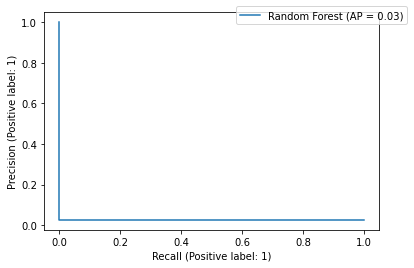

In [20]:
from sklearn.metrics import PrecisionRecallDisplay

# model = pickle.load(open('models/use_class_weight/PCA_50_rfc_42_256_0.pkl', 'rb'))

display = PrecisionRecallDisplay.from_estimator(
    model, X_val, y_val, name="Random Forest"
)

_ = display.ax_.legend(bbox_to_anchor=(1.1, 1.05))

In [21]:
BATCH_SIZE = 139 # to get n_estimators = 200-201 (1 tree per batch)
IMG_SIZE = (256, 256, 1)

BASEPATH = '/scratch/siads699w23_class_root/siads699w23_class/irinb/train' # directory of images preprocessed as numpy arrays
EXTRACTOR_PATH = '/home/irinb/models' # directory to save trained models

RANDOM_STATE = 42

ipca = pickle.load(open('/home/irinb/models/PCA_50_42_256_0.pkl', 'rb'))

train_gen, val_gen = rm.get_train_val_generators(
    train_img_ids = cv_img[0]['train'],
    val_img_ids = cv_img[0]['validate'],
    label_img_dict = splitter.labels,
    patient_img_dict = splitter.trainset,
    from_numpy = True,
    basepath = BASEPATH,
    batch_size = BATCH_SIZE,
    img_size = IMG_SIZE,
    n_classes = 2,
    shuffle = True,
    normalize = (0, 1),
    feature_extractor = ipca,
    CNN_preprocess = None
)

model_params = {'n_estimators': 200, 'criterion': 'gini',
                'max_samples': 1, 'max_features': None, 'class_weight': class_weight}

model = RandomForestClassifier( 
    criterion = model_params['criterion'],
    max_samples = model_params['max_samples'],
    max_features = model_params['max_features'],
    class_weight = model_params['class_weight'],

    warm_start=True, # enable incremental learning
    n_estimators=1, # starting, +1 every batch
    max_depth=None, # control for complexity
    bootstrap = True,

    min_samples_split=3,
    min_samples_leaf=2,
    max_leaf_nodes=None,

    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)

run_rfc(model, train_gen, val_gen, feature_extractor=ipca, batch_size=BATCH_SIZE, verbose=1)

---Start training model
------Training batch  0


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  1
------Current n_estimators:  2


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  2
------Current n_estimators:  3


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  3
------Current n_estimators:  4


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  4
------Current n_estimators:  5


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  5
------Current n_estimators:  6


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  6
------Current n_estimators:  7


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  7
------Current n_estimators:  8


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  8
------Current n_estimators:  9


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  9
------Current n_estimators:  10


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  10
------Current n_estimators:  11


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  11
------Current n_estimators:  12


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  12
------Current n_estimators:  13


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  13
------Current n_estimators:  14


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  14
------Current n_estimators:  15


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  15
------Current n_estimators:  16


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  16
------Current n_estimators:  17


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  17
------Current n_estimators:  18


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  18
------Current n_estimators:  19


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  19
------Current n_estimators:  20


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  20
------Current n_estimators:  21


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  21
------Current n_estimators:  22


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  22
------Current n_estimators:  23


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  23
------Current n_estimators:  24


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  24
------Current n_estimators:  25


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  25
------Current n_estimators:  26


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  26
------Current n_estimators:  27


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  27
------Current n_estimators:  28


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  28
------Current n_estimators:  29


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  29
------Current n_estimators:  30


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  30
------Current n_estimators:  31


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  31
------Current n_estimators:  32


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  32
------Current n_estimators:  33


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  33
------Current n_estimators:  34


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  34
------Current n_estimators:  35


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  35
------Current n_estimators:  36


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  36
------Current n_estimators:  37


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  37
------Current n_estimators:  38


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  38
------Current n_estimators:  39


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  39
------Current n_estimators:  40


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  40
------Current n_estimators:  41


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  41
------Current n_estimators:  42


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  42
------Current n_estimators:  43


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  43
------Current n_estimators:  44


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  44
------Current n_estimators:  45


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  45
------Current n_estimators:  46


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  46
------Current n_estimators:  47


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  47
------Current n_estimators:  48


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  48
------Current n_estimators:  49


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  49
------Current n_estimators:  50


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  50
------Current n_estimators:  51


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  51
------Current n_estimators:  52


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  52
------Current n_estimators:  53


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  53
------Current n_estimators:  54


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  54
------Current n_estimators:  55


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  55
------Current n_estimators:  56


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  56
------Current n_estimators:  57


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  57
------Current n_estimators:  58


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  58
------Current n_estimators:  59


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  59
------Current n_estimators:  60


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  60
------Current n_estimators:  61


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  61
------Current n_estimators:  62


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  62
------Current n_estimators:  63


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  63
------Current n_estimators:  64


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  64
------Current n_estimators:  65


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  65
------Current n_estimators:  66


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  66
------Current n_estimators:  67


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  67
------Current n_estimators:  68


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  68
------Current n_estimators:  69


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  69
------Current n_estimators:  70


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  70
------Current n_estimators:  71


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  71
------Current n_estimators:  72


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  72
------Current n_estimators:  73


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  73
------Current n_estimators:  74


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  74
------Current n_estimators:  75


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  75
------Current n_estimators:  76


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  76
------Current n_estimators:  77


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  77
------Current n_estimators:  78


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  78
------Current n_estimators:  79


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  79
------Current n_estimators:  80


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  80
------Current n_estimators:  81


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  81
------Current n_estimators:  82


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  82
------Current n_estimators:  83


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  83
------Current n_estimators:  84


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  84
------Current n_estimators:  85


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  85
------Current n_estimators:  86


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  86
------Current n_estimators:  87


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  87
------Current n_estimators:  88


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  88
------Current n_estimators:  89


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  89
------Current n_estimators:  90


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  90
------Current n_estimators:  91


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  91
------Current n_estimators:  92


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  92
------Current n_estimators:  93


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  93
------Current n_estimators:  94


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  94
------Current n_estimators:  95


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  95
------Current n_estimators:  96


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  96
------Current n_estimators:  97


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  97
------Current n_estimators:  98


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  98
------Current n_estimators:  99


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  99
------Current n_estimators:  100


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  100
------Current n_estimators:  101


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  101
------Current n_estimators:  102


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  102
------Current n_estimators:  103


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  103
------Current n_estimators:  104


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  104
------Current n_estimators:  105


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  105
------Current n_estimators:  106


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  106
------Current n_estimators:  107


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  107
------Current n_estimators:  108


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  108
------Current n_estimators:  109


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  109
------Current n_estimators:  110


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  110
------Current n_estimators:  111


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  111
------Current n_estimators:  112


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  112
------Current n_estimators:  113


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  113
------Current n_estimators:  114


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  114
------Current n_estimators:  115


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  115
------Current n_estimators:  116


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  116
------Current n_estimators:  117


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  117
------Current n_estimators:  118


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  118
------Current n_estimators:  119


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  119
------Current n_estimators:  120


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  120
------Current n_estimators:  121


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  121
------Current n_estimators:  122


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  122
------Current n_estimators:  123


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  123
------Current n_estimators:  124


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  124
------Current n_estimators:  125


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  125
------Current n_estimators:  126


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  126
------Current n_estimators:  127


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  127
------Current n_estimators:  128


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  128
------Current n_estimators:  129


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  129
------Current n_estimators:  130


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  130
------Current n_estimators:  131


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  131
------Current n_estimators:  132


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  132
------Current n_estimators:  133


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  133
------Current n_estimators:  134


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  134
------Current n_estimators:  135


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  135
------Current n_estimators:  136


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  136
------Current n_estimators:  137


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  137
------Current n_estimators:  138


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  138
------Current n_estimators:  139


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  139
------Current n_estimators:  140


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  140
------Current n_estimators:  141


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  141
------Current n_estimators:  142


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  142
------Current n_estimators:  143


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  143
------Current n_estimators:  144


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  144
------Current n_estimators:  145


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  145
------Current n_estimators:  146


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  146
------Current n_estimators:  147


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  147
------Current n_estimators:  148


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  148
------Current n_estimators:  149


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  149
------Current n_estimators:  150


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  150
------Current n_estimators:  151


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  151
------Current n_estimators:  152


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  152
------Current n_estimators:  153


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  153
------Current n_estimators:  154


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  154
------Current n_estimators:  155


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  155
------Current n_estimators:  156


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  156
------Current n_estimators:  157


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  157
------Current n_estimators:  158


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  158
------Current n_estimators:  159


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  159
------Current n_estimators:  160


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  160
------Current n_estimators:  161


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  161
------Current n_estimators:  162


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  162
------Current n_estimators:  163


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  163
------Current n_estimators:  164


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  164
------Current n_estimators:  165


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  165
------Current n_estimators:  166


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  166
------Current n_estimators:  167


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  167
------Current n_estimators:  168


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  168
------Current n_estimators:  169


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  169
------Current n_estimators:  170


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  170
------Current n_estimators:  171


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  171
------Current n_estimators:  172


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  172
------Current n_estimators:  173


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  173
------Current n_estimators:  174


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  174
------Current n_estimators:  175


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  175
------Current n_estimators:  176


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  176
------Current n_estimators:  177


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  177
------Current n_estimators:  178


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  178
------Current n_estimators:  179


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  179
------Current n_estimators:  180


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  180
------Current n_estimators:  181


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  181
------Current n_estimators:  182


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  182
------Current n_estimators:  183


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  183
------Current n_estimators:  184


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  184
------Current n_estimators:  185


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  185
------Current n_estimators:  186


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  186
------Current n_estimators:  187


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  187
------Current n_estimators:  188


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  188
------Current n_estimators:  189


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  189
------Current n_estimators:  190


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  190
------Current n_estimators:  191


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  191
------Current n_estimators:  192


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  192
------Current n_estimators:  193


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  193
------Current n_estimators:  194


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  194
------Current n_estimators:  195


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  195
------Current n_estimators:  196


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  196
------Current n_estimators:  197


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  197
------Current n_estimators:  198


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  198
------Current n_estimators:  199


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  199
------Current n_estimators:  200


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Training batch  200
------Current n_estimators:  201
---Evaluating model


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


------Getting predictions for batch  0
------Calculating scores of batch  0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  1
------Calculating scores of batch  1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  2
------Calculating scores of batch  2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  3
------Calculating scores of batch  3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  4
------Calculating scores of batch  4


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  5
------Calculating scores of batch  5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  6
------Calculating scores of batch  6


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  7
------Calculating scores of batch  7


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  8
------Calculating scores of batch  8


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------Getting predictions for batch  9
------Calculating scores of batch  9


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    0.0s finished
/home/irinb/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.